In [9]:
# Imports cell

import networkx as nx
import numpy as np
import random
import matplotlib.pyplot as plt
import matplotlib

archive=open('hugo_graph.txt','r')
string_graph=archive.read()
archive.close()

In [2]:
# Graph generation cell

graph = nx.DiGraph()
for n in range(77):
    graph.add_node(n)
for edge in string_graph.strip().split('\n'):
    e1,e2=edge.split(' ')
    graph.add_edge(int(e1),int(e2))

In [3]:
# Graph to matrix

A = nx.to_numpy_matrix(graph)
print(A)

[[0. 1. 1. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [4]:
# Matrix de probabilidades

N = A.shape[0]
P = np.zeros((N,N))
for i in range(0,N):
    for j in range(0,N):
        if(np.sum(A[i,:]) > 0):
            P[i,j] = A[i,j]/np.sum(A[i,:])
        else:
            P[i,j] = 1/N
print(P)

[[0.         0.1        0.1        ... 0.         0.         0.        ]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]]


In [5]:
# Matrix Google

G = np.zeros((N,N))
alpha = 0.85
for i in range(0,N):
    for j in range(0,N):
        G[i,j] = alpha*P[i,j] + (1-alpha)/N
print(G)

[[0.00194805 0.08694805 0.08694805 ... 0.00194805 0.00194805 0.00194805]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.00194805 0.00194805 0.00194805 ... 0.00194805 0.00194805 0.00194805]
 ...
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]
 [0.01298701 0.01298701 0.01298701 ... 0.01298701 0.01298701 0.01298701]]


In [6]:
# Pagerank algorithm

eigvals, eigvecs = np.linalg.eig(G.T)
eigvec1 = eigvecs[:,np.isclose(eigvals, 1)]
eigvec1 = eigvec1[:,0]

stationary = eigvec1 / eigvec1.sum()

stationary = stationary.real
for i in range(0,N):
    print(i+1, ':', stationary[i])

1 : 0.005796384353897908
2 : 0.0062890770239792445
3 : 0.006289077023979223
4 : 0.008961934759170427
5 : 0.006289077023979227
6 : 0.006289077023979229
7 : 0.006289077023979229
8 : 0.006289077023979229
9 : 0.006289077023979229
10 : 0.006289077023979229
11 : 0.005796384353897917
12 : 0.021506506005278484
13 : 0.00636765091966312
14 : 0.00636765091966312
15 : 0.00636765091966312
16 : 0.00636765091966312
17 : 0.005796384353897917
18 : 0.006343820653988267
19 : 0.0072425285799699425
20 : 0.008473758438564832
21 : 0.01027443210675984
22 : 0.013185521203675148
23 : 0.018789367715237076
24 : 0.04074410012066742
25 : 0.012139731770091
26 : 0.013286261992821837
27 : 0.008930334572784185
28 : 0.015239376892674064
29 : 0.007447106782894209
30 : 0.013219187633322091
31 : 0.011568465204325813
32 : 0.02305238305699903
33 : 0.00636765091966312
34 : 0.007447106782894209
35 : 0.008614912817327885
36 : 0.010445581791010045
37 : 0.013405163298462886
38 : 0.01910235770030963
39 : 0.03533936174557283
40 : 0

In [7]:
# Random Walk

nodes=list(graph.nodes())
n_simulations=10000
step_in_simulation=500

visits={}
i=0

for n in range(n_simulations):
    start_node=random.choice(nodes)
    next_node = start_node
    for s in range(step_in_simulation):
        if next_node+1 in visits:
            visits[next_node+1]+=1
            i+=1
        else:
            visits[next_node+1]=1
            i+=1
            
        neighbours=graph.edges(next_node)
        if len(neighbours)==0:
            break
        next_node=random.choice(list(neighbours))[1]
        
for visit in visits:
    visits[visit]=visits[visit]/i
    
visits

{41: 0.006253369272237197,
 36: 0.009559748427672956,
 39: 0.03884995507637017,
 30: 0.013656783468104223,
 35: 0.007834681042228212,
 37: 0.013477088948787063,
 3: 0.005175202156334231,
 12: 0.021491464510332434,
 38: 0.01861635220125786,
 48: 0.009991015274034142,
 49: 0.016460017969451932,
 70: 0.01376460017969452,
 76: 0.051105121293800536,
 8: 0.0052111410601976636,
 20: 0.007367475292003594,
 21: 0.008840970350404313,
 24: 0.040575022461814915,
 28: 0.014734950584007188,
 44: 0.008840970350404313,
 45: 0.00830188679245283,
 15: 0.00564240790655885,
 52: 0.007619047619047619,
 53: 0.010062893081761006,
 64: 0.019335130278526506,
 67: 0.04575022461814915,
 77: 0.0839173405211141,
 75: 0.010673854447439353,
 40: 0.005750224618149146,
 56: 0.02425876010781671,
 59: 0.012147349505840071,
 66: 0.03306379155435759,
 71: 0.01940700808625337,
 14: 0.005714285714285714,
 46: 0.007008086253369272,
 63: 0.016531895777178795,
 42: 0.007511230907457323,
 58: 0.008912848158131178,
 65: 0.025121

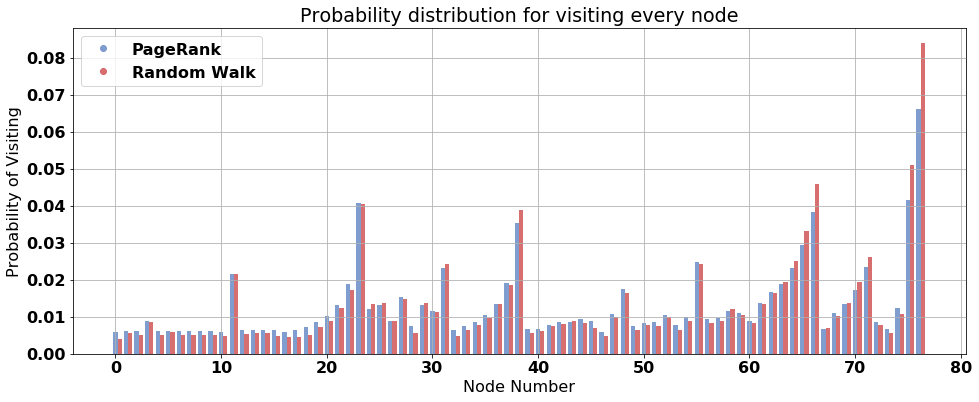

In [12]:
# Comparison

font = {'weight' : 'bold',
        'size'   : 16}

matplotlib.rc('font', **font)

D_id_color={
    'PageRank':(114/255,147/255,203/255,0.9),
    'Random Walk':(211/255,94/255,96/255,0.9)
}

plt.figure(figsize=(16,6))
for i in range(0,N):
    plt.bar(i,stationary[i],width = 0.4,color=D_id_color['PageRank'])
    
for i in range(0,N):
    plt.bar(i+0.4,visits[i+1],width = 0.4,color=D_id_color['Random Walk'])
    
plt.grid()
plt.xlabel('Node Number')
plt.ylabel('Probability of Visiting')
plt.title('Probability distribution for visiting every node')

markers = [plt.Line2D([0,0],[0,0],color=color, marker='o', linestyle='') for color in D_id_color.values()]
plt.legend(markers, D_id_color.keys(), numpoints=1)

plt.show()